In [1]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel('Delhi.xlsx',header=2,usecols=['date','pm25'],parse_dates=True)
data.head()

,date,pm25
0,2018-04-20 00:00:00,92
1,2018-04-19 23:00:00,89
2,2018-04-19 22:00:00,75
3,2018-04-19 21:00:00,57
4,2018-04-19 20:00:00,57


In [3]:
data=data.dropna()

In [4]:
data.tail()

,date,pm25
2369,2018-01-01 04:00:00,470
2370,2018-01-01 03:00:00,466
2371,2018-01-01 02:00:00,417
2372,2018-01-01 01:00:00,414
2373,2018-01-01 00:00:00,423


In [5]:
data=data.sort_values(by='date')
data.head(5)

,date,pm25
2373,2018-01-01 00:00:00,423
2372,2018-01-01 01:00:00,414
2371,2018-01-01 02:00:00,417
2370,2018-01-01 03:00:00,466
2369,2018-01-01 04:00:00,470


In [6]:
data=data.reset_index()

In [7]:
data=data.drop('index',axis=1)

In [8]:
data.head()

,date,pm25
0,2018-01-01 00:00:00,423
1,2018-01-01 01:00:00,414
2,2018-01-01 02:00:00,417
3,2018-01-01 03:00:00,466
4,2018-01-01 04:00:00,470


In [9]:
train=data.head(2364)
test=data.tail(10)

In [10]:
train_data=pd.DataFrame()
train_data['ds']=train['date']
train_data['y']=train['pm25']
train_data.head()

,ds,y
0,2018-01-01 00:00:00,423
1,2018-01-01 01:00:00,414
2,2018-01-01 02:00:00,417
3,2018-01-01 03:00:00,466
4,2018-01-01 04:00:00,470


In [11]:
train_data['y']=train_data['y'].replace('-',np.nan)

In [12]:
train_data['y']=train_data['y'].fillna(method='ffill')

In [13]:
train_data['y']=train_data['y'].astype('float64')

In [14]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
train_data['y']=scalar.fit_transform(train_data[['y']])

In [15]:
Train=train_data.head(2364)
Test=train_data.tail(10)

In [16]:
train_data.tail(10)

,ds,y
2354,2018-04-19 05:00:00,0.250509
2355,2018-04-19 06:00:00,0.427699
2356,2018-04-19 07:00:00,0.615071
2357,2018-04-19 08:00:00,0.490835
2358,2018-04-19 09:00:00,0.224033
2359,2018-04-19 10:00:00,0.266802
2360,2018-04-19 11:00:00,0.140530
2361,2018-04-19 12:00:00,0.105906
2362,2018-04-19 13:00:00,0.093686
2363,2018-04-19 14:00:00,0.107943


In [ ]:
future = list()
for i in range (1,24):
    date = '2018-04-20 %d:00:00' %i
    future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])

In [17]:
p_basic=Prophet(yearly_seasonality=True)
p_basic.fit(Train)

In [18]:
q=p_basic.make_future_dataframe(periods=24,freq='H',include_history=True)

In [19]:
q.tail(24)

,ds
2364,2018-04-19 15:00:00
2365,2018-04-19 16:00:00
2366,2018-04-19 17:00:00
2367,2018-04-19 18:00:00
2368,2018-04-19 19:00:00
2369,2018-04-19 20:00:00
2370,2018-04-19 21:00:00
2371,2018-04-19 22:00:00
2372,2018-04-19 23:00:00
2373,2018-04-20 00:00:00


In [20]:
forecast=p_basic.predict(Test)

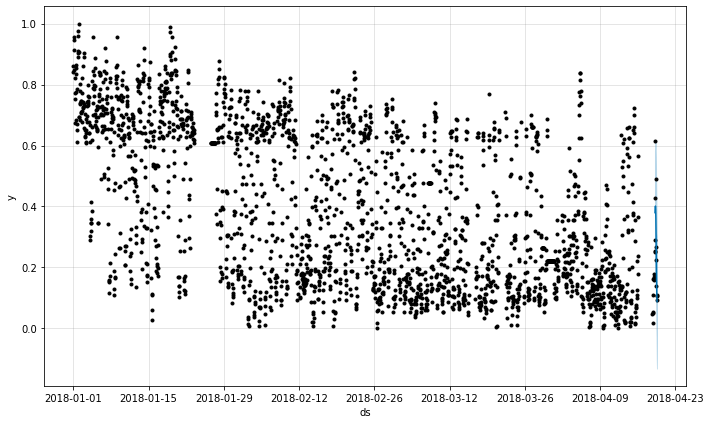

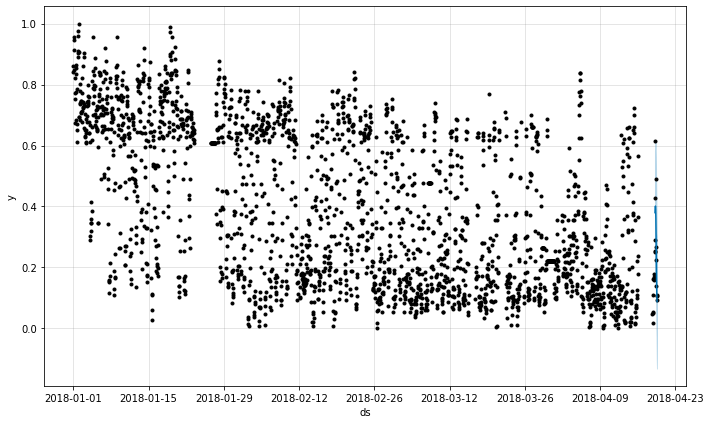

In [21]:
p_basic.plot(forecast)

In [22]:
pred_f=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
final_df=pd.merge(Test, pred_f, how="left", on="ds")
final_df = final_df[["ds", "y", "yhat",'yhat_lower','yhat_upper']]
final_df.rename(columns = {'y' : 'y_test'}, inplace = True)

In [23]:
final_df

,ds,y_test,yhat,yhat_lower,yhat_upper
0,2018-04-19 05:00:00,0.250509,0.379692,0.171442,0.583105
1,2018-04-19 06:00:00,0.427699,0.392998,0.179114,0.597702
2,2018-04-19 07:00:00,0.615071,0.401264,0.205497,0.612874
3,2018-04-19 08:00:00,0.490835,0.393507,0.186639,0.602656
4,2018-04-19 09:00:00,0.224033,0.359940,0.161217,0.565148
5,2018-04-19 10:00:00,0.266802,0.300122,0.091529,0.493434
6,2018-04-19 11:00:00,0.140530,0.226563,0.016072,0.445178
7,2018-04-19 12:00:00,0.105906,0.158951,-0.039824,0.387482
8,2018-04-19 13:00:00,0.093686,0.112206,-0.103623,0.313124
9,2018-04-19 14:00:00,0.107943,0.087858,-0.131971,0.300869


In [24]:
from statsmodels.tools.eval_measures import rmse
print("Root mean squared error: ",rmse(Test['y'], final_df['yhat']))

Root mean squared error:  0.10179452315670053


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [26]:
future_pred=p_basic.predict(q)

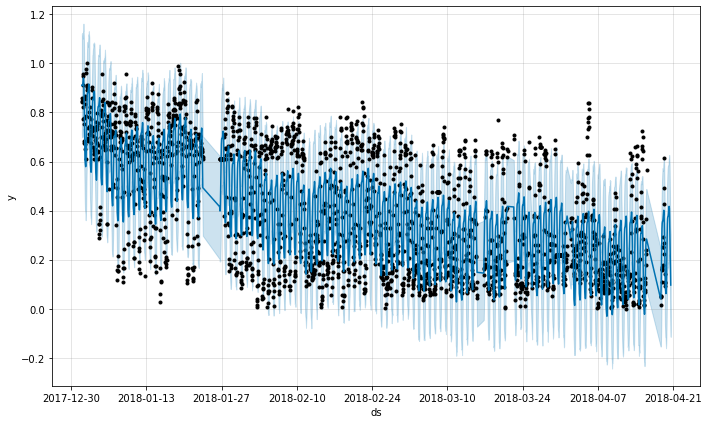

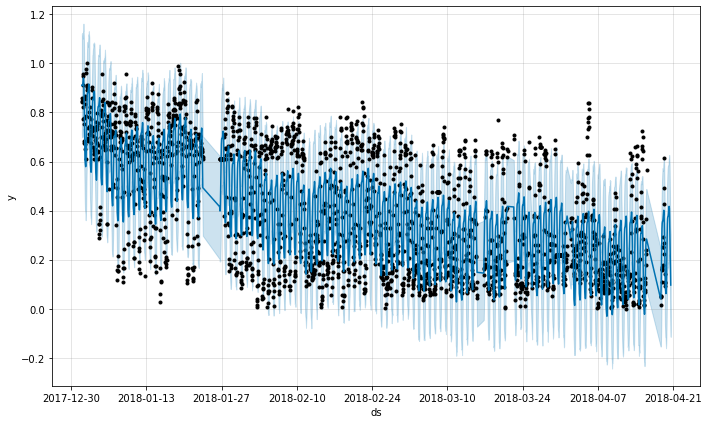

In [27]:
p_basic.plot(future_pred)

In [28]:
p_basic.component_modes

{'additive': ['yearly',
  'weekly',
  'daily',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [29]:
future_pred['yhat']

0       0.909522
1       0.912595
2       0.911190
3       0.911655
4       0.916216
          ...   
2383    0.313393
2384    0.238780
2385    0.170058
2386    0.122150
2387    0.096589
Name: yhat, Length: 2388, dtype: float64

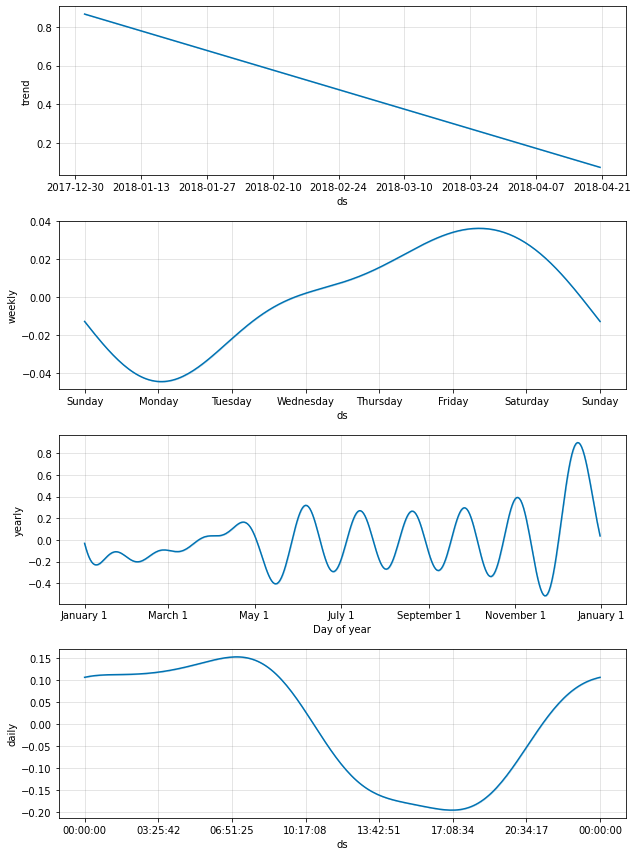

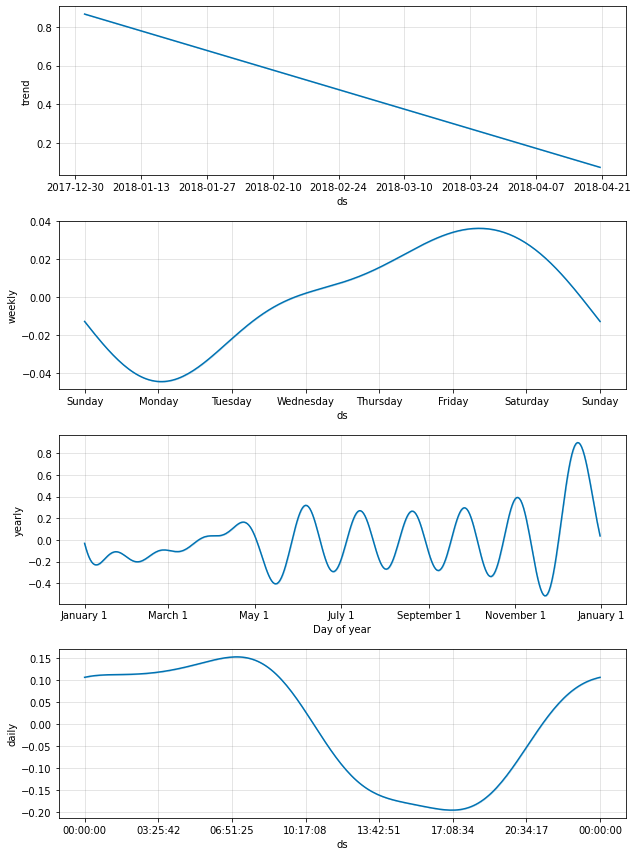

In [30]:
p_basic.plot_components(future_pred)

In [31]:
result=pd.DataFrame()
result['date']=future_pred['ds']
result['pm25']=future_pred['yhat']

In [32]:
result.head()

,date,pm25
0,2018-01-01 00:00:00,0.909522
1,2018-01-01 01:00:00,0.912595
2,2018-01-01 02:00:00,0.911190
3,2018-01-01 03:00:00,0.911655
4,2018-01-01 04:00:00,0.916216


In [33]:
result['pm25']=scalar.inverse_transform(result[['pm25']])

In [34]:
result

,date,pm25
0,2018-01-01 00:00:00,447.575459
1,2018-01-01 01:00:00,449.084086
2,2018-01-01 02:00:00,448.394394
3,2018-01-01 03:00:00,448.622524
4,2018-01-01 04:00:00,450.862252
...,...,...
2383,2018-04-20 10:00:00,154.876032
2384,2018-04-20 11:00:00,118.241222
2385,2018-04-20 12:00:00,84.498580
2386,2018-04-20 13:00:00,60.975867
